
# 自己組織化マップ
> 以下に示した簡単な自己組織化マップを実現させていきたいと思います。



必要なライブラリをインポート

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

図のように配置されたニューロンの位置を行列で表記


In [0]:
Vec = np.array([[0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4], [0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4]]); Vec

array([[0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
        2, 3, 4],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
        4, 4, 4]])

正規分布に従う乱数で重みベクトルを初期化

In [0]:
W = np.random.rand(2, 25); W

array([[0.80471503, 0.77350122, 0.57680965, 0.37137744, 0.84666257,
        0.17885077, 0.52271635, 0.46128608, 0.7855732 , 0.78045971,
        0.61502978, 0.85055832, 0.04083125, 0.85958296, 0.46735411,
        0.00440895, 0.16358403, 0.37029068, 0.62112984, 0.58638567,
        0.24154973, 0.81738005, 0.70575086, 0.28629415, 0.63161972],
       [0.09631044, 0.57385796, 0.64939224, 0.93480071, 0.37043998,
        0.45154875, 0.10799782, 0.16542436, 0.43632523, 0.57921383,
        0.76827894, 0.86775583, 0.42040844, 0.7465938 , 0.38176575,
        0.19808665, 0.9959877 , 0.35812725, 0.52740024, 0.86718042,
        0.21579277, 0.2856352 , 0.71081198, 0.30159454, 0.35254532]])

In [0]:
W = W / np.linalg.norm(W, axis=0)

ニューロンの位置Vecと、対応する重みWが定義できた。初期値としてのWについて、重みベクトルの向きをプロットしてみる。

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


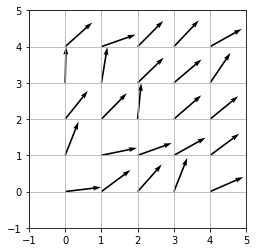

In [0]:
plt.figure()
#ベクトル
plt.quiver(Vec[0, :], Vec[1, :], W[0, :], W[1, :], angles='xy', scale_units='xy', scale=1)
plt.xlim([-1,5])
plt.ylim([-1,5])
plt.grid()
plt.axes().set_aspect('equal')
plt.show()

入力データXを用意

In [0]:
X = np.array([[1, 0, -1, 0],[0, 1, 0, -1]])

In [0]:
#np.argmax(np.dot(W.T, X),axis=0)
#最大を示すインデックスが重複したらどうする?

In [0]:
np.argmax(np.dot(W.T, X[:, 0]))

0

勝者ニューロンの位置ベクトルは

In [0]:
Vec[:, 6]

array([1, 1])

なので、他のベクトルから減算し、それをD_Vecとする。

In [0]:
D_Vec = Vec - Vec[:, 6][:, np.newaxis]; D_Vec

array([[-1,  0,  1,  2,  3, -1,  0,  1,  2,  3, -1,  0,  1,  2,  3, -1,
         0,  1,  2,  3, -1,  0,  1,  2,  3],
       [-1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,
         2,  2,  2,  2,  3,  3,  3,  3,  3]])

それぞれの距離を求め、Dに格納。

In [0]:
D = np.linalg.norm(D_Vec, axis=0); D

array([1.41421356, 1.        , 1.41421356, 2.23606798, 3.16227766,
       1.        , 0.        , 1.        , 2.        , 3.        ,
       1.41421356, 1.        , 1.41421356, 2.23606798, 3.16227766,
       2.23606798, 2.        , 2.23606798, 2.82842712, 3.60555128,
       3.16227766, 3.        , 3.16227766, 3.60555128, 4.24264069])

In [0]:
H = norm.pdf(D); H

array([1.46762663e-01, 2.41970725e-01, 1.46762663e-01, 3.27471765e-02,
       2.68805194e-03, 2.41970725e-01, 3.98942280e-01, 2.41970725e-01,
       5.39909665e-02, 4.43184841e-03, 1.46762663e-01, 2.41970725e-01,
       1.46762663e-01, 3.27471765e-02, 2.68805194e-03, 3.27471765e-02,
       5.39909665e-02, 3.27471765e-02, 7.30688275e-03, 5.99785460e-04,
       2.68805194e-03, 4.43184841e-03, 2.68805194e-03, 5.99785460e-04,
       4.92333887e-05])

学習係数Cは1とする。

In [0]:
c = 0.01

In [0]:
W = W + c * H * (X[:, 0][:, np.newaxis] - W)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


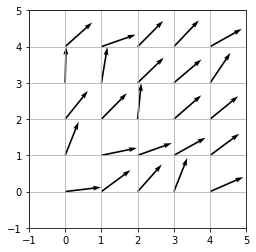

In [0]:
plt.figure()
#ベクトル
plt.quiver(Vec[0, :], Vec[1, :], W[0, :], W[1, :], angles='xy', scale_units='xy', scale=1)
plt.xlim([-1,5])
plt.ylim([-1,5])
plt.grid()
plt.axes().set_aspect('equal')
plt.show()

In [0]:
np.linalg.norm(W, axis=0)

array([0.99998962, 0.99952463, 0.99950761, 0.99979348, 0.99999775,
       0.99847388, 0.99991781, 0.9998583 , 0.99993212, 0.99999127,
       0.99945022, 0.99927557, 0.99867531, 0.99991979, 0.99999394,
       0.99967987, 0.99954774, 0.99990795, 0.99998263, 0.99999736,
       0.99999317, 0.99999752, 0.99999206, 0.99999813, 0.99999994])

In [0]:
c = 0.01
for _ in range(10000):
    for i in range(4):
        j = np.argmax(np.dot(W.T, X[:, i]),axis=0)
        D_Vec = Vec - Vec[:, j][:, np.newaxis]
        D = np.linalg.norm(D_Vec, axis=0)
        H = norm.pdf(D, scale=2)
        W = W + c * H * (X[:, i][:, np.newaxis] - W)
        W = W / np.linalg.norm(W, axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


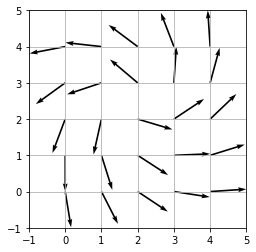

In [0]:
plt.figure()
#ベクトル
plt.quiver(Vec[0, :], Vec[1, :], W[0, :], W[1, :], angles='xy', scale_units='xy', scale=1)
plt.xlim([-1,5])
plt.ylim([-1,5])
plt.grid()
plt.axes().set_aspect('equal')
plt.show()